In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import re

In [59]:
telecom_customer_data = pd.read_csv('Telecom Customers Churn.csv')

In [82]:
telecom_customer_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [97]:
telecom_customer_data.shape

(7043, 21)

In [63]:
telecom_customer_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [56]:
def convert_to_snake_case(column_name):
    """
    Convert a string to snake_case.

    Parameters:
    column_name (str): The original column name.

    Returns:
    str: The column name converted to snake_case.
    """
    # Replace spaces or special characters with underscores
    snake_case_name = re.sub(r'[\W\s]+', '_', column_name)
    
    # Convert CamelCase to snake_case
    snake_case_name = re.sub(r'(?<!^)(?=[A-Z])', '_', snake_case_name)
    
    # Convert to lowercase
    snake_case_name = snake_case_name.lower()
    
    # Replace multiple underscores with a single underscore
    snake_case_name = re.sub(r'_+', '_', snake_case_name)
    
    # Remove any leading or trailing underscores
    snake_case_name = snake_case_name.strip('_')
    
    return snake_case_name

def rename_columns_to_snake_case(df):
    """
    Rename all columns in a DataFrame to snake_case.

    Parameters:
    df (pd.DataFrame): The DataFrame whose columns need to be renamed.

    Returns:
    pd.DataFrame: A new DataFrame with columns renamed to snake_case.
    """
    # Generate a mapping of original column names to snake_case names
    column_mapping = {col: convert_to_snake_case(col) for col in df.columns}
    
    # Rename the columns using the mapping and return the new DataFrame
    df_snake_case = df.rename(columns=column_mapping)
    
    return df_snake_case

In [70]:
telecom_customer_data_snake_case = rename_columns_to_snake_case(telecom_customer_data)

In [75]:
telecom_customer_data_snake_case.columns

Index(['customer_i_d', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [100]:
telecom_customer_data_snake_case.dtypes

customer_i_d          object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_t_v         object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges         object
churn                 object
dtype: object

In [136]:
telecom_customer_data_snake_case.isna().sum()

customer_i_d         0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_t_v        0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [127]:
def display_unique_values_and_counts(df):
    """
    Display unique values and their counts for each column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame whose columns will be analyzed.
    
    Returns:
    None
    """
    for column in df.columns:
        print(f"Column: {column}")
        print(df[column].value_counts(dropna = False))
        print("-" * 50)  # Separator for readability


display_unique_values_and_counts(telecom_customer_data_snake_case)

Column: customer_i_d
customer_i_d
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
--------------------------------------------------
Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
--------------------------------------------------
Column: senior_citizen
senior_citizen
0    5901
1    1142
Name: count, dtype: int64
--------------------------------------------------
Column: partner
partner
No     3641
Yes    3402
Name: count, dtype: int64
--------------------------------------------------
Column: dependents
dependents
No     4933
Yes    2110
Name: count, dtype: int64
--------------------------------------------------
Column: tenure
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
---------

In [177]:
telecom_customer_data_snake_case['total_charges'] = pd.to_numeric(telecom_customer_data_snake_case['total_charges'], errors='coerce')

# Check for invalid/missing values in 'TotalCharges'
total_charges_issues = telecom_customer_data_snake_case['total_charges'].isnull().sum()
print(f"Number of invalid 'TotalCharges' entries: {total_charges_issues}")

Number of invalid 'TotalCharges' entries: 11


In [179]:
# Drop rows with missing 'TotalCharges'
telecom_customer_data_cleaned = telecom_customer_data_snake_case.dropna(subset=['total_charges'])

In [181]:
telecom_customer_data_cleaned

,customer_i_d,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_t_v,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [184]:
telecom_customer_data_cleaned.dtypes

customer_i_d          object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_t_v         object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [188]:
telecom_customer_data_cleaned.duplicated().sum()

0

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Define X and y
X = data_cleaned.drop(columns=['customer_i_d', 'churn'])
y = data_cleaned['churn'].map({'Yes': 1, 'No': 0})  # Convert 'churn' to binary

# One-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded[['tenure', 'monthly_charges', 'total_charges']])
X_encoded[['tenure', 'monthly_charges', 'total_charges']] = X_scaled

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model with class weights to handle imbalance
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid search for best hyperparameters
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate on test set
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [203]:
from sklearn.metrics import classification_report, roc_auc_score

# Use the best estimator to make predictions
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)

# Classification report
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

# ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest ROC-AUC: {roc_auc_rf}")

# Feature importance
importances = grid_search_rf.best_estimator_.feature_importances_
feature_importance = pd.Series(importances, index=X_encoded.columns).sort_values(ascending=False)

# Display top 10 most important features
print("Top 10 most important features:")
print(feature_importance.head(10))


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest ROC-AUC: 0.6896803868075435
Top 10 most important features:
total_charges                      0.175141
tenure                             0.169331
monthly_charges                    0.149963
contract_Two year                  0.057777
internet_service_Fiber optic       0.041903
payment_method_Electronic check    0.034567
contract_One year                  0.030843
online_security_Yes                0.028801
gender_Male                        0.025637
paperless_billing_Yes              0.023803
dtype: float64


In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import pandas as pd

# Initialize Random Forest with the best parameters
rf_best = RandomForestClassifier(
    max_depth=20, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=300, 
    class_weight='balanced',  # To handle class imbalance
    random_state=42
)

# Train the Random Forest model
rf_best.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=300,
                       random_state=42)

In [207]:
# Predict on the test set
y_pred_rf = rf_best.predict(X_test)

# Classification report to show precision, recall, and F1-score
print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix to evaluate true positives, true negatives, etc.
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
print(f"Random Forest ROC-AUC: {roc_auc_rf}")


Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      1033
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
[[936  97]
 [197 177]]
Random Forest ROC-AUC: 0.6896803868075435


Top 10 most important features:
total_charges                      0.175141
tenure                             0.169331
monthly_charges                    0.149963
contract_Two year                  0.057777
internet_service_Fiber optic       0.041903
payment_method_Electronic check    0.034567
contract_One year                  0.030843
online_security_Yes                0.028801
gender_Male                        0.025637
paperless_billing_Yes              0.023803
dtype: float64


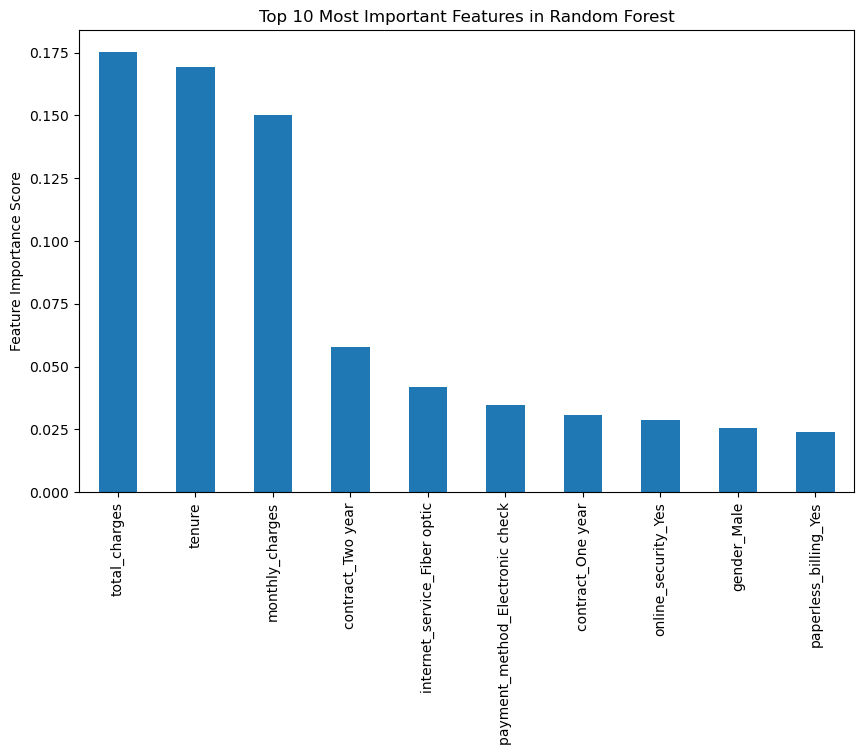

In [209]:
# Get feature importance from the Random Forest model
importances = rf_best.feature_importances_
feature_importance = pd.Series(importances, index=X_encoded.columns).sort_values(ascending=False)

# Display the top 10 most important features
print("Top 10 most important features:")
print(feature_importance.head(10))

# Optionally, plot feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
feature_importance.head(10).plot(kind='bar')
plt.title('Top 10 Most Important Features in Random Forest')
plt.ylabel('Feature Importance Score')
plt.show()


In [211]:
from sklearn.model_selection import cross_val_score

# Cross-validation to get a more stable performance estimate
cv_scores = cross_val_score(rf_best, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy: 0.8010666666666667


In [214]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution after SMOTE
print(y_train_smote.value_counts())

# Retrain the Random Forest model using SMOTE data
rf_best.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred_rf_smote = rf_best.predict(X_test)

# Evaluate the model after using SMOTE
print("Random Forest Classification Report (with SMOTE)")
print(classification_report(y_test, y_pred_rf_smote))

# Confusion matrix for the SMOTE model
conf_matrix_smote = confusion_matrix(y_test, y_pred_rf_smote)
print("Confusion Matrix (with SMOTE):")
print(conf_matrix_smote)

# ROC-AUC score after SMOTE
roc_auc_rf_smote = roc_auc_score(y_test, y_pred_rf_smote)
print(f"Random Forest ROC-AUC (with SMOTE): {roc_auc_rf_smote}")


churn
1    4130
0    4130
Name: count, dtype: int64
Random Forest Classification Report (with SMOTE)
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.63      0.58       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.77      0.76      0.76      1407

Confusion Matrix (with SMOTE):
[[831 202]
 [138 236]]
Random Forest ROC-AUC (with SMOTE): 0.7177345460757567


In [216]:
# Adjust the probability threshold for classifying churn
y_pred_proba = rf_best.predict_proba(X_test)[:, 1]
threshold = 0.45  # Example threshold adjustment
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate with the adjusted threshold
print("Classification Report (Adjusted Threshold)")
print(classification_report(y_test, y_pred_adjusted))


Classification Report (Adjusted Threshold)
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.51      0.68      0.59       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.78      0.74      0.75      1407



In [222]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the individual models
rf = RandomForestClassifier(max_depth=20, n_estimators=300, class_weight='balanced', random_state=42)
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]))
lr = LogisticRegression(class_weight='balanced', random_state=42)

# Create the Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('lr', lr)], voting='soft', n_jobs=-1)

# Train the voting classifier on the SMOTE data
voting_clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the ensemble model
print("Voting Classifier (Soft Voting) Classification Report")
print(classification_report(y_test, y_pred_voting))

# ROC-AUC score
roc_auc_voting = roc_auc_score(y_test, y_pred_voting)
print(f"Voting Classifier ROC-AUC: {roc_auc_voting}")


Voting Classifier (Soft Voting) Classification Report
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.53      0.67      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.76      1407

Voting Classifier ROC-AUC: 0.7304124325079852


In [224]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold

# Create the base models for stacking
estimators = [
    ('rf', RandomForestClassifier(max_depth=20, n_estimators=300, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', use_label_encoder=False, scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]))),
    ('lr', LogisticRegression(class_weight='balanced', random_state=42))
]

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=StratifiedKFold(5))

# Train the stacking classifier on the SMOTE data
stacking_clf.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the stacking model
print("Stacking Classifier Classification Report")
print(classification_report(y_test, y_pred_stacking))

# ROC-AUC score
roc_auc_stacking = roc_auc_score(y_test, y_pred_stacking)
print(f"Stacking Classifier ROC-AUC: {roc_auc_stacking}")


C:\Users\asens\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:38:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\asens\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:38:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\asens\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:38:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\asens\anaconda3\Lib\site-packages\

Stacking Classifier Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.61      0.58       374

    accuracy                           0.77      1407
   macro avg       0.71      0.72      0.71      1407
weighted avg       0.78      0.77      0.77      1407

Stacking Classifier ROC-AUC: 0.7189096707062654


In [228]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]), n_estimators=300)
xgb.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report")
print(classification_report(y_test, y_pred_xgb))

roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"XGBoost ROC-AUC: {roc_auc_xgb}")


C:\Users\asens\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:41:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1033
           1       0.51      0.60      0.55       374

    accuracy                           0.74      1407
   macro avg       0.68      0.70      0.69      1407
weighted avg       0.76      0.74      0.75      1407

XGBoost ROC-AUC: 0.6959986229817104


In [236]:
y_pred_proba = xgb.predict_proba(X_test)[:, 1]  # Get probability estimates for class 1
threshold = 0.45  # Lowering the threshold may improve recall
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

# Evaluate with adjusted threshold
print("Classification Report (Adjusted Threshold)")
print(classification_report(y_test, y_pred_adjusted))


Classification Report (Adjusted Threshold)
              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1033
           1       0.51      0.63      0.56       374

    accuracy                           0.74      1407
   macro avg       0.68      0.71      0.69      1407
weighted avg       0.76      0.74      0.75      1407



In [238]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the base models
rf = RandomForestClassifier(max_depth=20, n_estimators=300, class_weight='balanced', random_state=42)
lr = LogisticRegression(class_weight='balanced', random_state=42)
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]), n_estimators=300)

# Train the XGBoost model to get probabilities for threshold adjustment
xgb.fit(X_train_smote, y_train_smote)

# Create the Voting Classifier (soft voting)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('xgb', xgb), ('lr', lr)], voting='soft', n_jobs=-1)

# Train the voting classifier
voting_clf.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set (for threshold tuning)
y_pred_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

# Adjust the threshold for the Voting Classifier
threshold = 0.45  # You can adjust this to tune recall vs. precision
y_pred_adjusted_voting = (y_pred_proba_voting >= threshold).astype(int)

# Evaluate the threshold-adjusted Voting Classifier
print("Threshold-Adjusted Voting Classifier Classification Report")
print(classification_report(y_test, y_pred_adjusted_voting))

# ROC-AUC score for the threshold-adjusted Voting Classifier
roc_auc_voting_adjusted = roc_auc_score(y_test, y_pred_adjusted_voting)
print(f"Voting Classifier ROC-AUC (Adjusted Threshold): {roc_auc_voting_adjusted}")


C:\Users\asens\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:46:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Threshold-Adjusted Voting Classifier Classification Report
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1033
           1       0.53      0.72      0.61       374

    accuracy                           0.75      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.75      0.76      1407

Voting Classifier ROC-AUC (Adjusted Threshold): 0.7434591631248997


In [240]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Create a pipeline with StandardScaler and Logistic Regression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features for Logistic Regression
    ('lr', LogisticRegression(class_weight='balanced', random_state=42))
])

# Initialize XGBoost (no scaling needed)
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, scale_pos_weight=len(y_train_smote[y_train_smote == 0]) / len(y_train_smote[y_train_smote == 1]))

# Voting Classifier (XGBoost and Logistic Regression with StandardScaler)
voting_clf = VotingClassifier(estimators=[('xgb', xgb), ('lr', lr_pipeline)], voting='soft', n_jobs=-1)

# Train the voting classifier
voting_clf.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_voting = voting_clf.predict(X_test)
print("Voting Classifier with StandardScaler (Logistic Regression) and XGBoost Classification Report")
print(classification_report(y_test, y_pred_voting))


Voting Classifier with StandardScaler (Logistic Regression) and XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1033
           1       0.53      0.68      0.60       374

    accuracy                           0.76      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.78      0.76      0.77      1407



In [242]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score

# Create a pipeline for scaling and linear SVM
linear_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features before applying SVM
    ('svm', SVC(kernel='linear', class_weight='balanced', random_state=42))  # Linear SVM with balanced class weights
])

# Train the Linear SVM on the SMOTE-balanced data
linear_svm_pipeline.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_linear_svm = linear_svm_pipeline.predict(X_test)
print("Linear SVM Classification Report")
print(classification_report(y_test, y_pred_linear_svm))

roc_auc_linear_svm = roc_auc_score(y_test, y_pred_linear_svm)
print(f"Linear SVM ROC-AUC: {roc_auc_linear_svm}")


Linear SVM Classification Report
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1033
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.78      0.75      0.76      1407

Linear SVM ROC-AUC: 0.7382500478850345


In [244]:
from sklearn.svm import SVC

# Create a pipeline for scaling and SVM with RBF kernel
rbf_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features before applying SVM
    ('svm', SVC(kernel='rbf', class_weight='balanced', random_state=42))  # RBF Kernel SVM with balanced class weights
])

# Train the RBF SVM on the SMOTE-balanced data
rbf_svm_pipeline.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_rbf_svm = rbf_svm_pipeline.predict(X_test)
print("RBF SVM Classification Report")
print(classification_report(y_test, y_pred_rbf_svm))

roc_auc_rbf_svm = roc_auc_score(y_test, y_pred_rbf_svm)
print(f"RBF SVM ROC-AUC: {roc_auc_rbf_svm}")


RBF SVM Classification Report
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407

RBF SVM ROC-AUC: 0.7453266794705209


In [246]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RBF SVM
param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1],
    'svm__kernel': ['rbf']
}

# Create a grid search object
grid_search_svm = GridSearchCV(rbf_svm_pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search
grid_search_svm.fit(X_train_smote, y_train_smote)

# Best parameters and results
print("Best parameters for SVM:", grid_search_svm.best_params_)
y_pred_best_svm = grid_search_svm.predict(X_test)
print("Best SVM Classification Report")
print(classification_report(y_test, y_pred_best_svm))

roc_auc_best_svm = roc_auc_score(y_test, y_pred_best_svm)
print(f"Best SVM ROC-AUC: {roc_auc_best_svm}")


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for SVM: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best SVM Classification Report
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1033
           1       0.49      0.59      0.53       374

    accuracy                           0.73      1407
   macro avg       0.66      0.68      0.67      1407
weighted avg       0.75      0.73      0.74      1407

Best SVM ROC-AUC: 0.6829065957105362


In [250]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

# Create a pipeline for scaling and RBF SVM with probability estimates
rbf_svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features before applying SVM
    ('svm', SVC(kernel='rbf', class_weight='balanced', random_state=42, probability=True))  # Enable probability estimates
])

# Train the RBF SVM on the SMOTE-balanced data
rbf_svm_pipeline.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set (for threshold tuning)
y_pred_proba_rbf_svm = rbf_svm_pipeline.predict_proba(X_test)[:, 1]

# Adjust the threshold (e.g., 0.45)
threshold = 0.45
y_pred_adjusted_rbf_svm = (y_pred_proba_rbf_svm >= threshold).astype(int)

# Evaluate the threshold-adjusted predictions
print("Threshold-Adjusted RBF SVM Classification Report")
print(classification_report(y_test, y_pred_adjusted_rbf_svm))

roc_auc_rbf_svm_adjusted = roc_auc_score(y_test, y_pred_adjusted_rbf_svm)
print(f"Threshold-Adjusted RBF SVM ROC-AUC: {roc_auc_rbf_svm_adjusted}")


Threshold-Adjusted RBF SVM Classification Report
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.75      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407

Threshold-Adjusted RBF SVM ROC-AUC: 0.7427913610220996


In [252]:
from sklearn.model_selection import cross_val_score

# Example of cross-validation on your pipeline
cv_scores = cross_val_score(rbf_svm_pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation ROC-AUC scores:", cv_scores)
print("Mean ROC-AUC:", cv_scores.mean())


Cross-Validation ROC-AUC scores: [0.83761651 0.83484901 0.80326674 0.83406755 0.8468361 ]
Mean ROC-AUC: 0.831327184238017


In [254]:
# Train the model on the training set
rbf_svm_pipeline.fit(X_train_smote, y_train_smote)

# Evaluate on the training set
y_train_pred = rbf_svm_pipeline.predict(X_train)
print("Training Set Classification Report")
print(classification_report(y_train, y_train_pred))

roc_auc_train = roc_auc_score(y_train, y_train_pred)
print(f"Training Set ROC-AUC: {roc_auc_train}")

# Evaluate on the test set
y_test_pred = rbf_svm_pipeline.predict(X_test)
print("Test Set Classification Report")
print(classification_report(y_test, y_test_pred))

roc_auc_test = roc_auc_score(y_test, y_test_pred)
print(f"Test Set ROC-AUC: {roc_auc_test}")


Training Set Classification Report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4130
           1       0.59      0.81      0.68      1495

    accuracy                           0.80      5625
   macro avg       0.75      0.80      0.77      5625
weighted avg       0.83      0.80      0.81      5625

Training Set ROC-AUC: 0.8018977706155304
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.75      0.76      1407

Test Set ROC-AUC: 0.7453266794705209


In [264]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score

# Assuming the best model pipeline is 'rbf_svm_pipeline' and you have 'X_test' and 'y_test'

# Predicted values using the best RBF SVM model (with threshold adjustment)
y_pred_proba_rbf_svm = rbf_svm_pipeline.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
threshold = 0.45  # Use the threshold we previously set
y_pred_adjusted_rbf_svm = (y_pred_proba_rbf_svm >= threshold).astype(int)

# Actual values from the test set
y_actual = y_test  # Actual labels

# Create a DataFrame to show actual and predicted side by side
comparison_df = pd.DataFrame({'Actual': y_actual, 'Predicted': y_pred_adjusted_rbf_svm})

# Display the first few rows of the comparison
print(comparison_df.head(50))

# Evaluate the model performance
print("Test Set Classification Report")
print(classification_report(y_test, y_pred_adjusted_rbf_svm))

roc_auc_rbf_svm_adjusted = roc_auc_score(y_test, y_pred_adjusted_rbf_svm)
print(f"Threshold-Adjusted RBF SVM ROC-AUC: {roc_auc_rbf_svm_adjusted}")


      Actual  Predicted
2481       0          0
6784       0          0
6125       1          1
3052       0          0
4099       0          0
3223       0          1
3774       0          0
3469       0          1
3420       0          0
1196       0          0
2173       0          1
1291       1          1
2579       0          0
6578       0          0
2515       0          0
3257       0          1
1976       1          1
132        0          0
5194       1          1
1950       1          0
813        0          0
3968       0          0
4042       0          1
1081       0          1
4322       0          1
5266       0          0
2627       0          0
1041       0          0
4154       1          1
469        1          1
1876       0          1
6488       1          1
4734       1          0
4859       0          0
4022       0          0
6743       0          0
7025       0          1
6081       0          1
217        0          0
4852       0          0
5179       1    